<a href="https://colab.research.google.com/github/prachi-dalvi/firstrepo/blob/main/MobileNet_Leaf_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## MAIN COPY

## **Identifying plants and it’s medicinal properties through an image.**

# **Import Packages**
In this category, we simply import all of the libraries that we would need

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf
import PIL.ImageOps as ImageOps
import PIL.Image as Image
from tqdm import tqdm
import shutil
import random

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.models import load_model

# Now we create the class names and store them in the labels.


In [ ]:
class_names = ['Karanj',
                'Neem',
               'Peeple']

## **Organize data into train, valid, test dirs**

In [ ]:

os.chdir('/content/drive/MyDrive/code/imagedataset')
if os.path.isdir('/content/drive/MyDrive/code/imagedataset/train') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in class_names:
      print(i)
      shutil.move(f'{i}', 'train')
      os.mkdir(f'valid/{i}')
      os.mkdir(f'test/{i}')

      valid_samples = random.sample(os.listdir(f'train/{i}'), 10)
      for j in valid_samples:
          shutil.move(f'train/{i}/{j}', f'valid/{i}')

      test_samples = random.sample(os.listdir(f'train/{i}'), 5)
      for k in test_samples:
          shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

# **Loading the dataset**

In [ ]:
train_path = '/content/drive/MyDrive/code/imagedataset/train'
valid_path = '/content/drive/MyDrive/code/imagedataset/valid'
test_path = '/content/drive/MyDrive/code/imagedataset/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 6125 images belonging to 3 classes.
Found 1928 images belonging to 3 classes.
Found 2633 images belonging to 3 classes.


# **MobileNet model use**

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

**Removing Last 5 layers which was not useful**

In [ ]:
x = mobile.layers[-5].output

In [ ]:
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)
output = Dense(units=len(class_names), activation='softmax')(x)

**Merging the model**

In [ ]:
model = Model(inputs=mobile.input, outputs=output)

In [ ]:
for layer in model.layers[:-22]:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(x=train_batches,
            steps_per_epoch=len(train_batches)//20,
            validation_data=valid_batches,
            validation_steps=len(valid_batches)//20,
            epochs=5,
            verbose=2
)

Epoch 1/5
30/30 - 125s - loss: 0.1134 - accuracy: 0.9600 - val_loss: 0.0103 - val_accuracy: 1.0000 - 125s/epoch - 4s/step
Epoch 2/5
30/30 - 77s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000 - 77s/epoch - 3s/step
Epoch 3/5
30/30 - 68s - loss: 0.0232 - accuracy: 0.9933 - val_loss: 0.0121 - val_accuracy: 1.0000 - 68s/epoch - 2s/step
Epoch 4/5
30/30 - 58s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000 - 58s/epoch - 2s/step
Epoch 5/5
30/30 - 57s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 4.4953e-04 - val_accuracy: 1.0000 - 57s/epoch - 2s/step


In [ ]:
def plot_accuracy_loss(history):
    """
        We plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

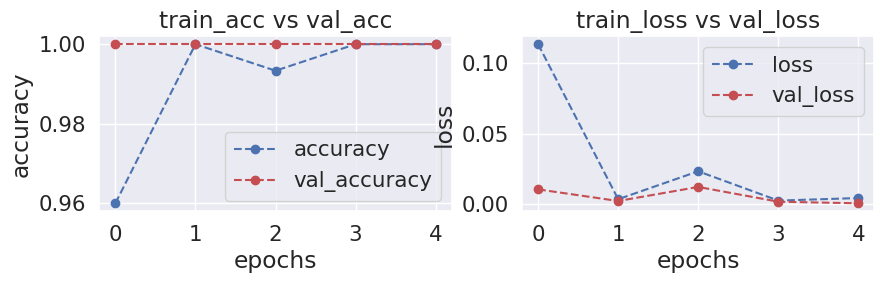

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_labels = test_batches.classes

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=2)

264/264 - 509s - 509s/epoch - 2s/step


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

Confusion matrix, without normalization
[[879   0   0]
 [  0 984   0]
 [  0   0 770]]


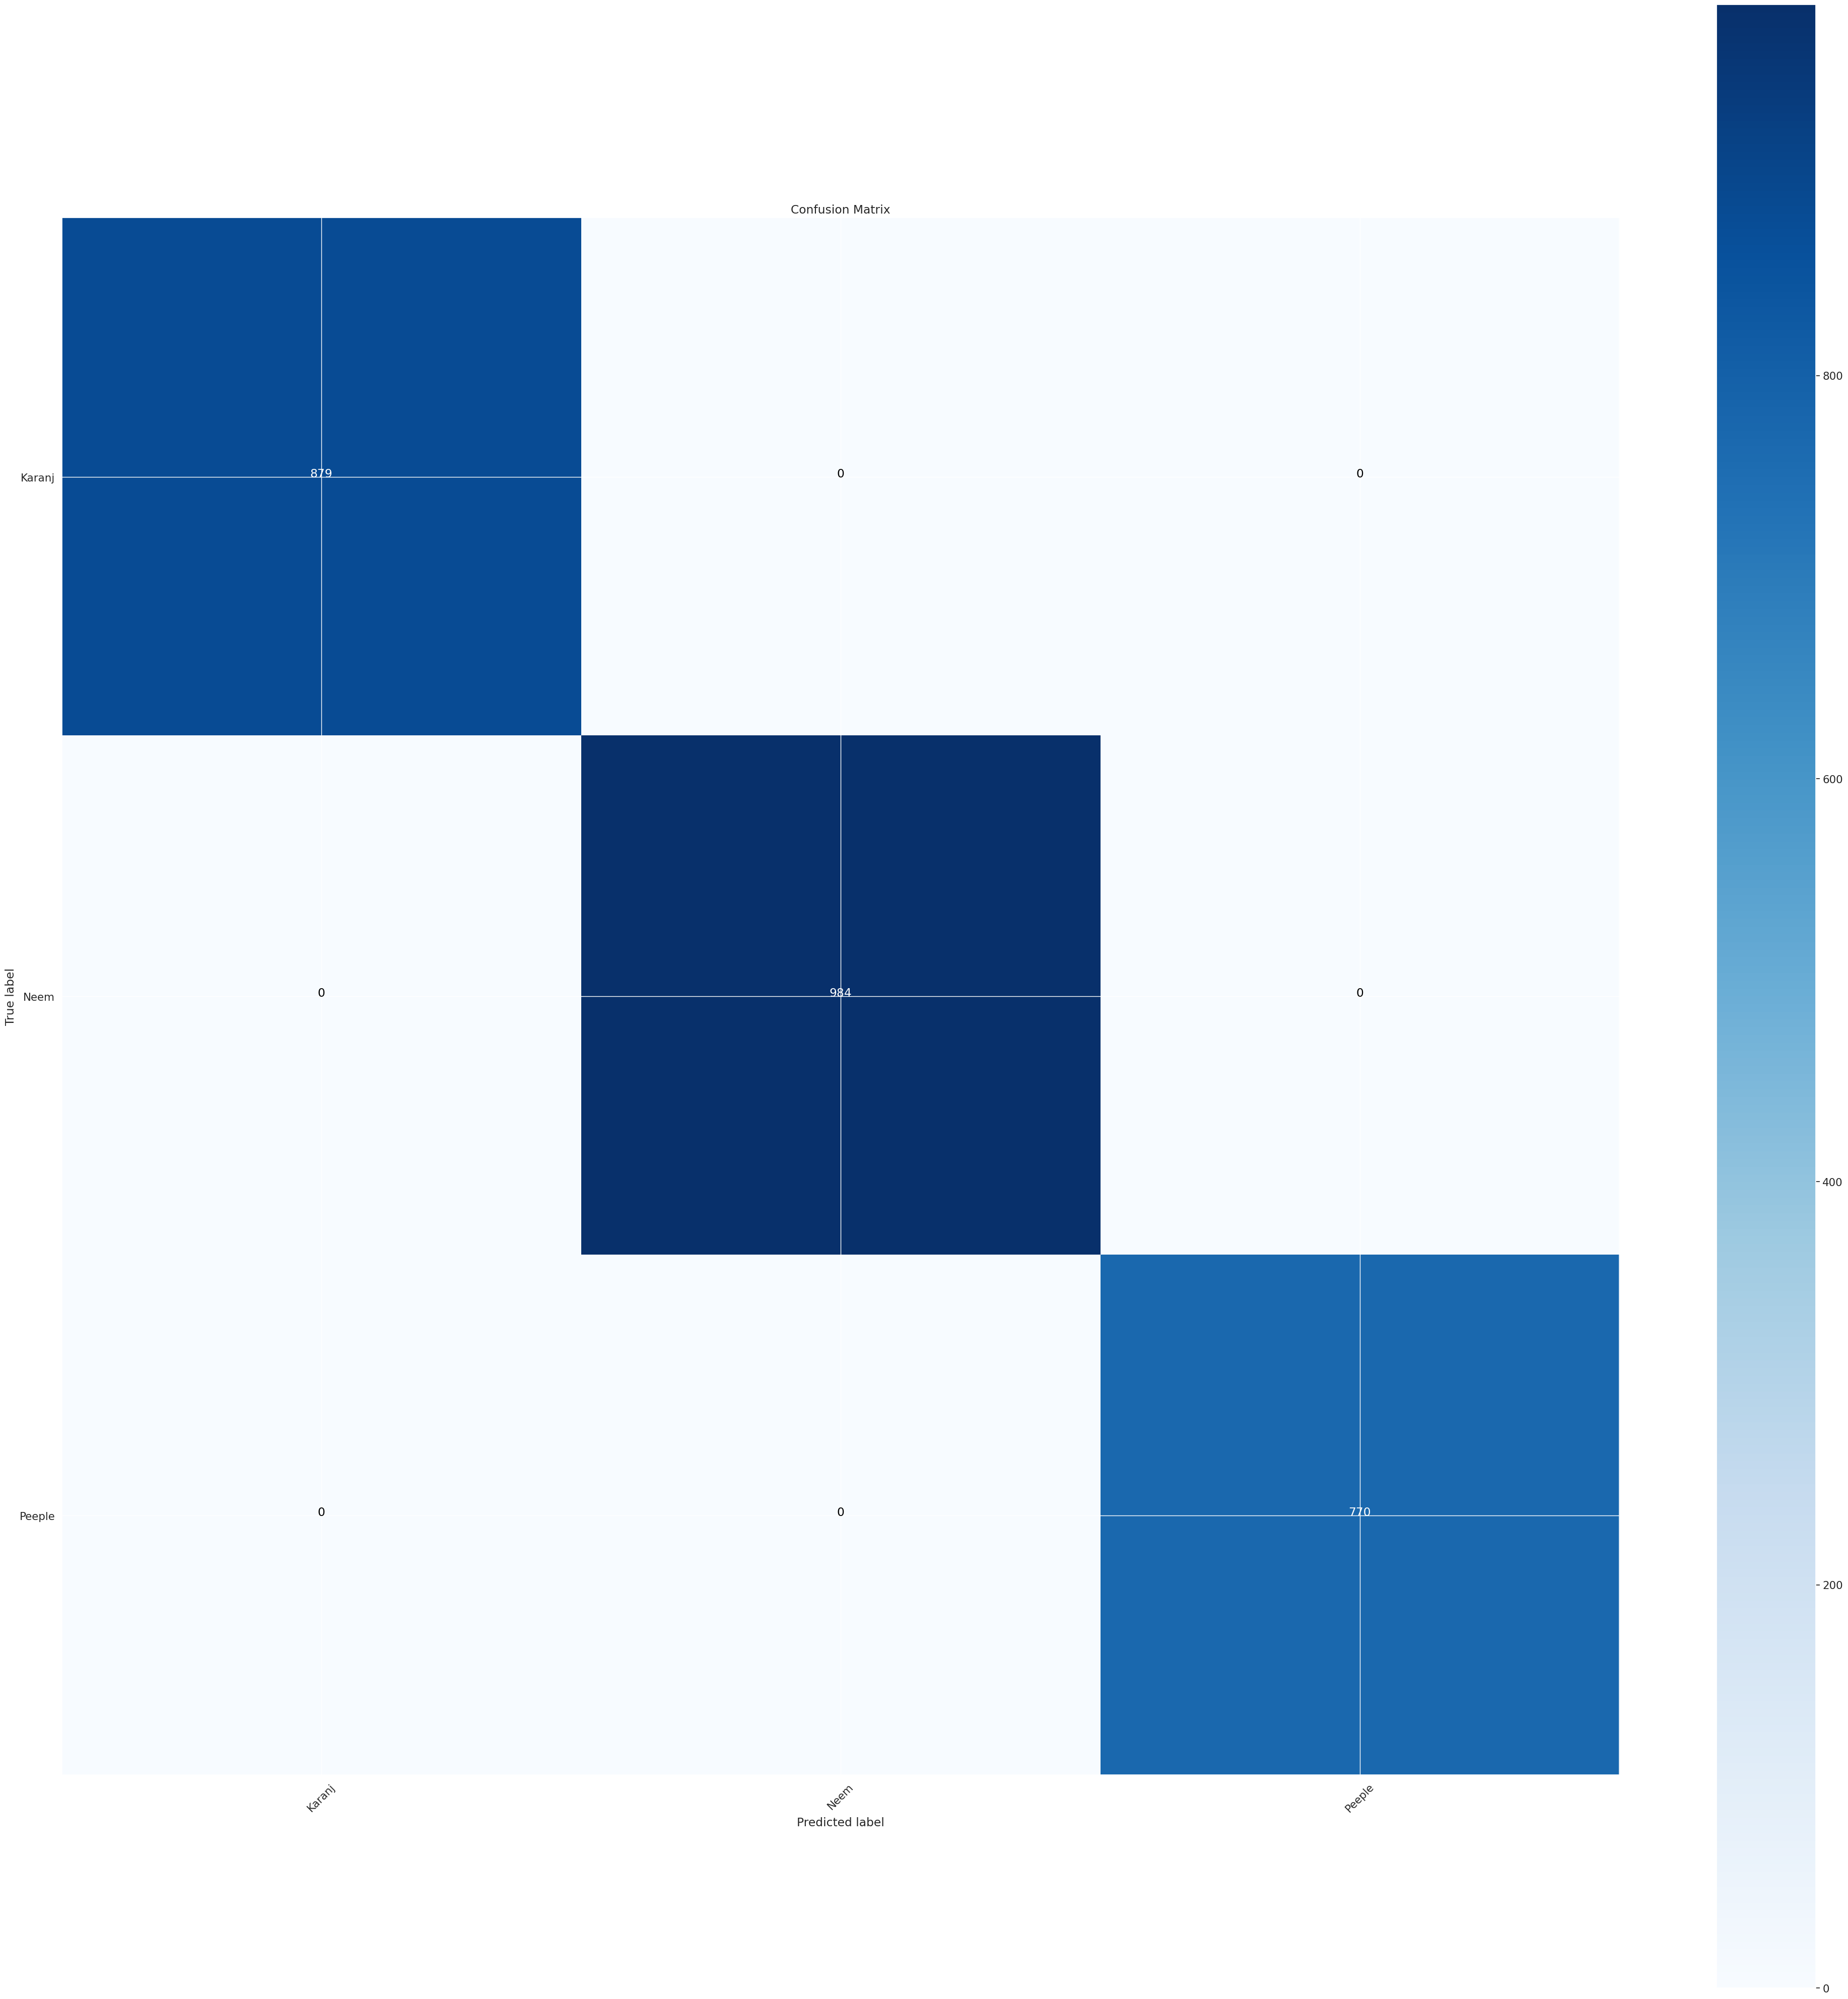

In [ ]:
cm_plot_labels = class_names
plt.figure(figsize=(40, 40))
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
os.chdir('/content/drive/MyDrive/code/imagedataset')

In [ ]:
model.save('prachi_model_save.h5')

# Testing The model in real life

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications import imagenet_utils
from IPython.display import Image
from tensorflow.keras.models import load_model

In [ ]:
class_names = ['Karanj',
                'Neem',
               'Peeple']

In [ ]:
savedModel=load_model('prachi_model_save.h5')
savedModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

<PIL.Image.Image image mode=RGB size=224x224 at 0x7FF9703B6C50>


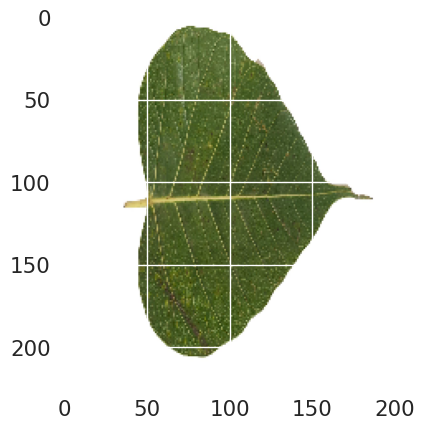

In [ ]:
filename = "/content/drive/MyDrive/code/imagedataset/valid/peepal/PEEPAL04818.jpg"
Image(filename,width=224,height=224)
img = image.load_img(filename,target_size=(224,224))
print(img)
plt.imshow(img)

In [ ]:
resizedimg = image.img_to_array(img)
finalimg = np.expand_dims(resizedimg,axis=0)
finalimg = tf.keras.applications.mobilenet_v2.preprocess_input(finalimg)
finalimg.shape

(1, 224, 224, 3)

In [ ]:
predictions = savedModel.predict(finalimg)
 
# To predict and decode the image details
# results = imagenet_utils.decode_predictions(predictions)

1/1 [==============================] - 3s 3s/step


In [ ]:
class_names[np.argmax(predictions)]

'Peeple'

# **Now we list the medicinal properties of the plant detected**

In [ ]:
class_prediction=class_names[np.argmax(predictions)]

In [ ]:

if class_prediction == 'Karanj':
    print('Karanj Popularly known as Indian Beech in outside India  is a medicinal herb used mainly for skin disorders. Karanja  oil is applied to the skin to manage boils, rashes and eczema as well as heal wounds as it has antimicrobial properties. The oil can also be useful in arthritis due to it’s anti-inflammatory activities.')


if class_prediction == 'Neem':
    print('Neem: Prevalent in traditional remedies from a long time, Neem is considered as a boon for Mankind. It helps to cure many skin diseases such as Acne, fungal infections, dandruff, leprosy, and also nourishes and detoxifies the skin. It also boosts your immunity and act as an Insect and Mosquito Repellent. It helps to reduce joint paint as well and prevents Gastrointestinal Diseases')


if class_prediction == 'Peeple':
    print('Peepal: The bark of the Peeple tree, rich in vitamin K, is an effective complexion corrector and preserver. It also helps in various ailments such as Strengthening blood capillaries, minimising inflammation, Healing skin bruises faster, increasing skin resilience, treating pigmentation issues, wrinkles, dark circles, lightening surgery marks, scars, and stretch marks.')



Peepal: The bark of the Peeple tree, rich in vitamin K, is an effective complexion corrector and preserver. It also helps in various ailments such as Strengthening blood capillaries, minimising inflammation, Healing skin bruises faster, increasing skin resilience, treating pigmentation issues, wrinkles, dark circles, lightening surgery marks, scars, and stretch marks.
